In [ ]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt, lfilter, iirnotch
import pywt

# Parameters
sampling_rate = 2400  # Hz
fs = sampling_rate

# Find all relevant files
csv_files_posterior_prostowniki = sorted(glob.glob("prostowniki_*.csv"))
csv_files_anterior_zginacze = sorted(glob.glob("zginacze_*.csv"))
csv_file_anterior_zgniacze_full_movemnet = 'full_movement_range_anterior_zginacze.csv'

# Filtering functions
def bandpass_filter(signal, fs, lowcut=20.0, highcut=500.0, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

def notch_filter(signal, fs, notch_freq=50.0, quality_factor=30.0):
    nyquist = 0.5 * fs
    b_notch, a_notch = iirnotch(notch_freq / nyquist, quality_factor)
    return filtfilt(b_notch, a_notch, signal)

# def notch_filter50hz(signal, fs, notch_freq=50.0, quality_factor=30.0):
#     nyquist = 0.5 * fs
#     b_notch, a_notch = iirnotch(notch_freq / nyquist, quality_factor)
#     return filtfilt(b_notch, a_notch, signal)

# def notch_filter150hz(signal, fs, notch_freq=150.0, quality_factor=30.0):
#     nyquist = 0.5 * fs
#     b_notch, a_notch = iirnotch(notch_freq / nyquist, quality_factor)
#     return filtfilt(b_notch, a_notch, signal)

def comb_filter(signal, fs, freq=50, alpha=0.95):
    delay = int(fs / freq)
    b = np.zeros(delay + 1)
    b[0] = 1
    b[-1] = -alpha
    a = [1]
    return lfilter(b, a, signal)
    

### Prostowniki

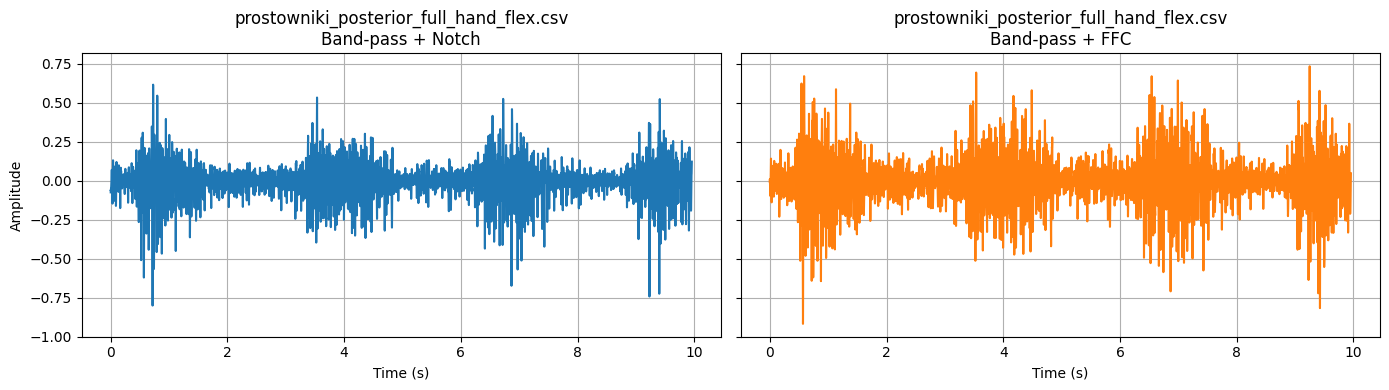

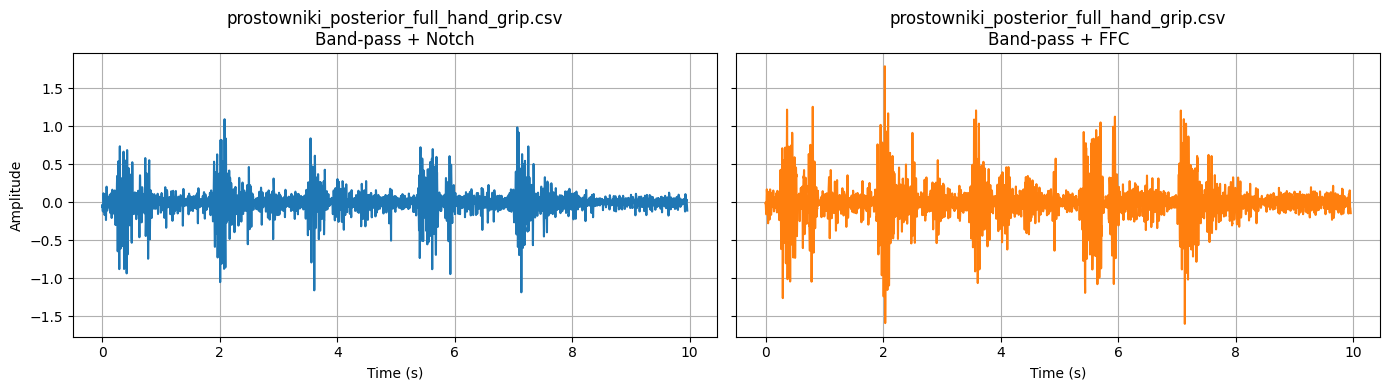

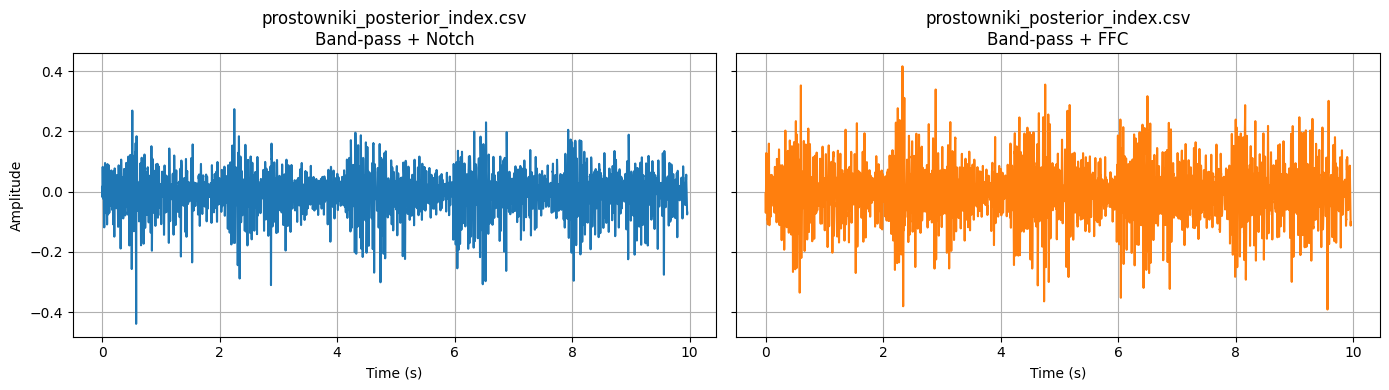

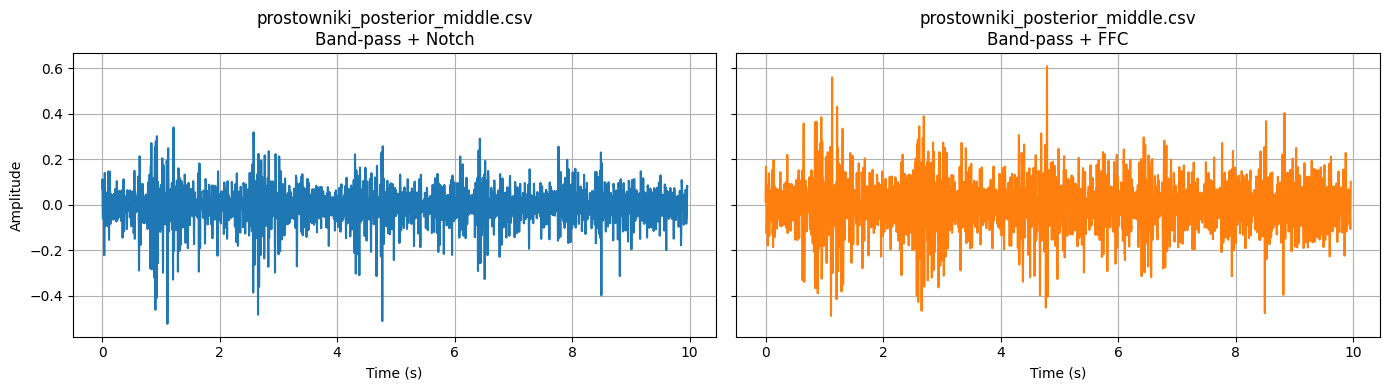

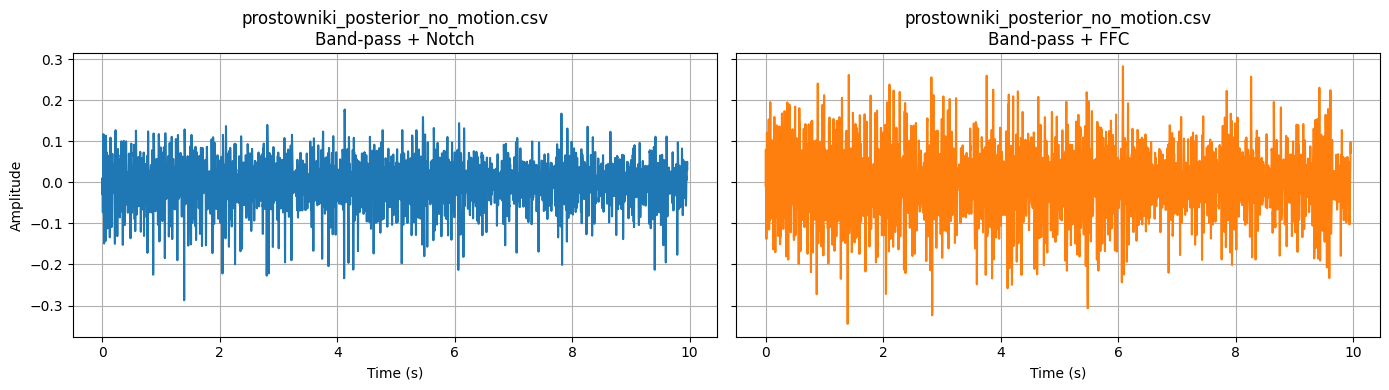

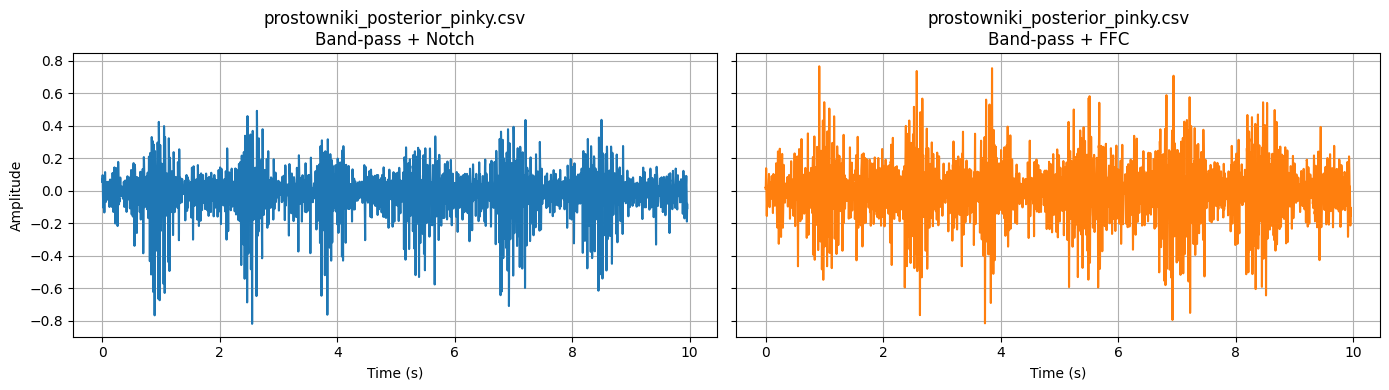

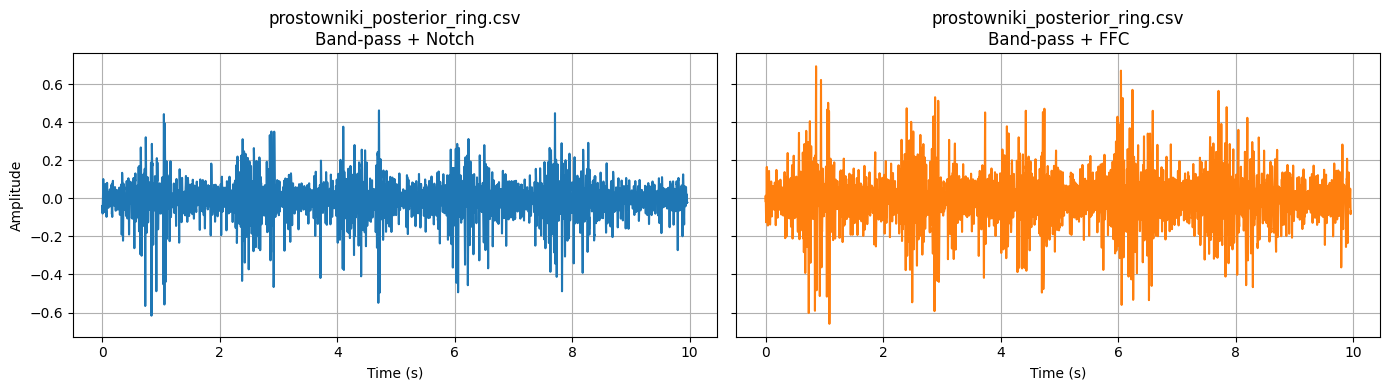

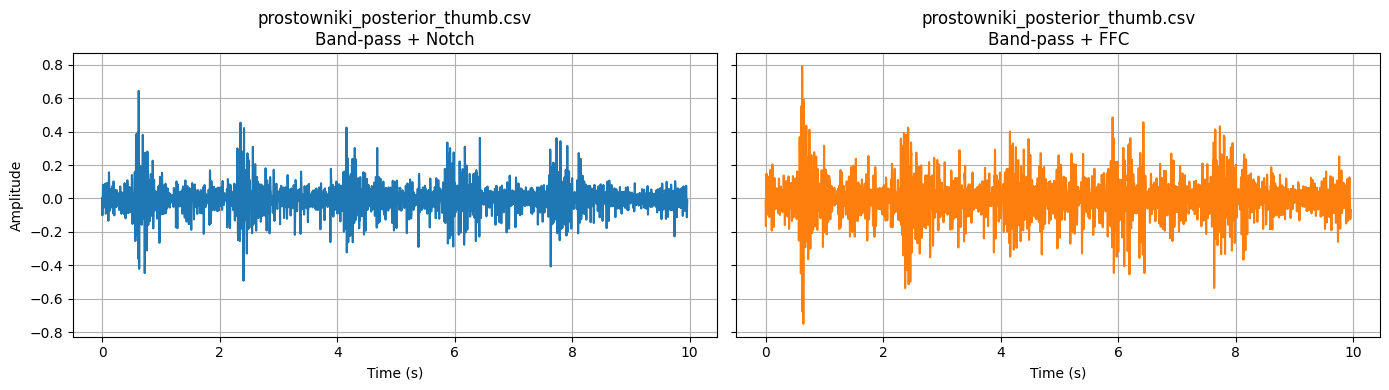

In [81]:
for filename in csv_files_posterior_prostowniki:
    adc_values = pd.read_csv(filename, header=None).squeeze()
    adc_values = adc_values[100:].reset_index(drop=True)
    time = np.arange(len(adc_values)) / fs

    # Band-pass + Notch
    bandpassed = bandpass_filter(adc_values, fs)
    bandpass_notch = notch_filter(bandpassed, fs)
    # bandpass_notch = notch_filter50hz(bandpassed, fs)
    # bandpass_notch = notch_filter150hz(bandpass_notch, fs)

    # Band-pass + FFC (band-pass first, then FFC)
    bandpassed_ffc = bandpass_filter(adc_values, fs)
    ffc = comb_filter(bandpassed_ffc, fs)

    fig, axs = plt.subplots(1, 2, figsize=(14, 4), sharey=True)
    axs[0].plot(time, bandpass_notch, color='tab:blue')
    axs[0].set_title(f"{filename}\nBand-pass + Notch")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Amplitude")
    axs[0].grid(True)

    axs[1].plot(time, ffc, color='tab:orange')
    axs[1].set_title(f"{filename}\nBand-pass + FFC")
    axs[1].set_xlabel("Time (s)")
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

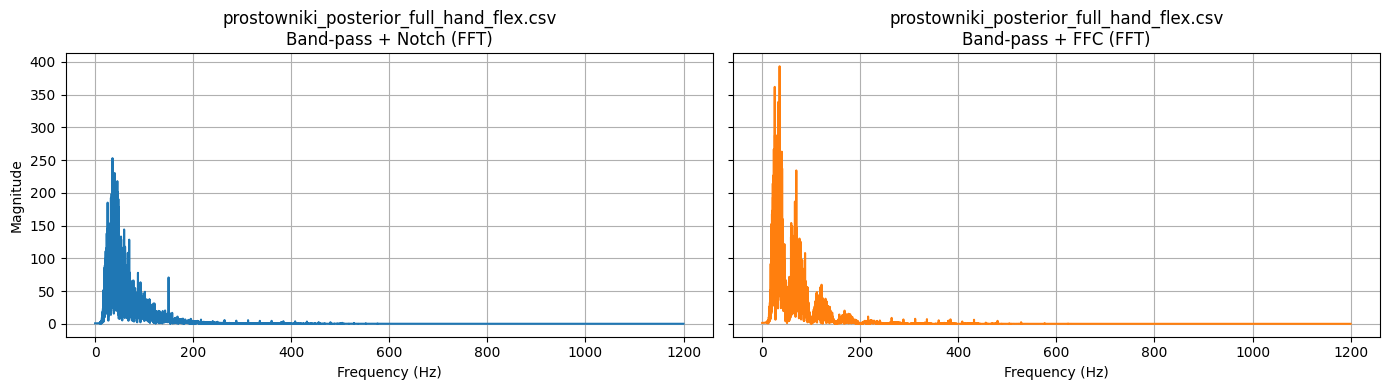

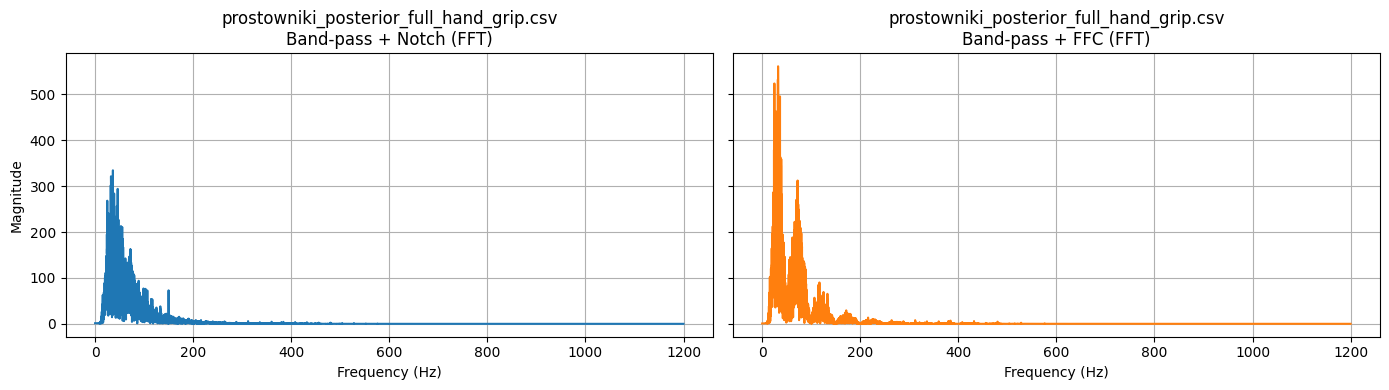

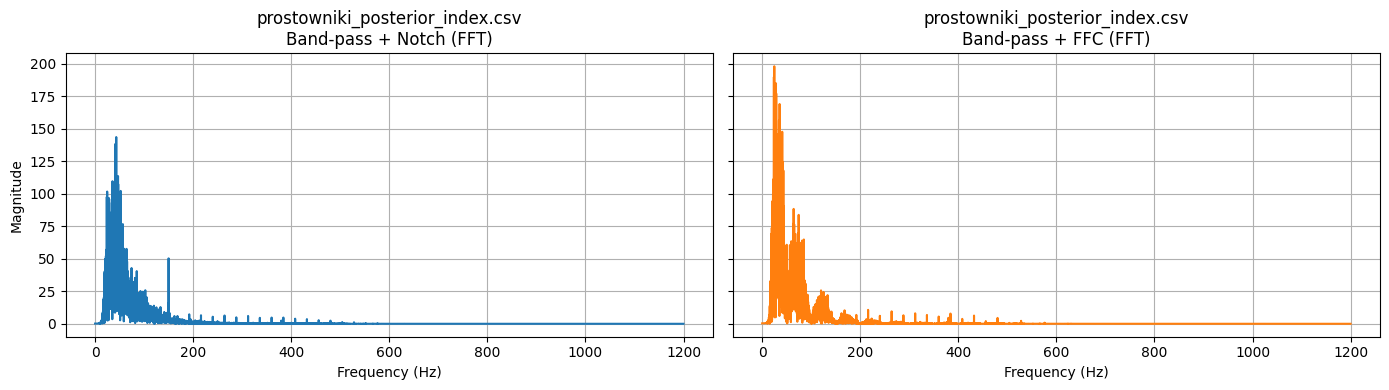

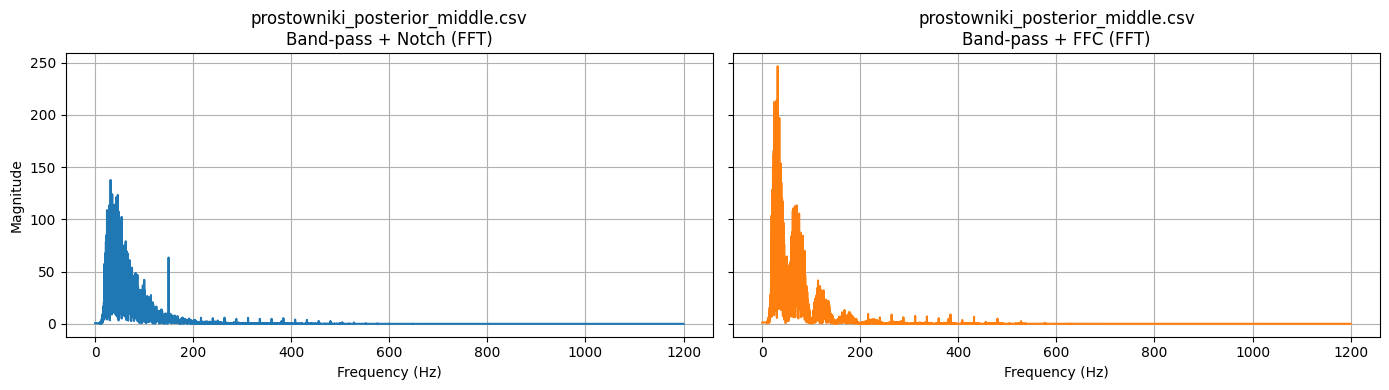

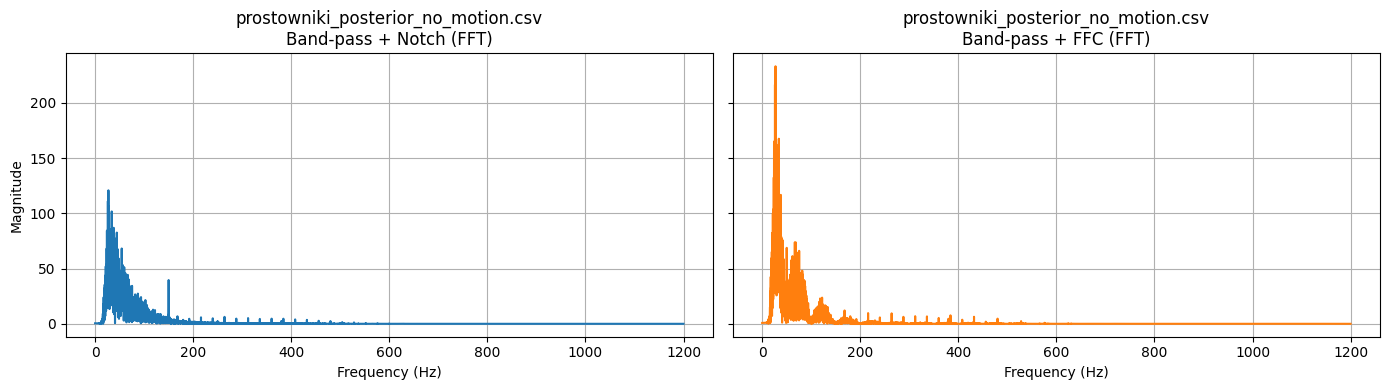

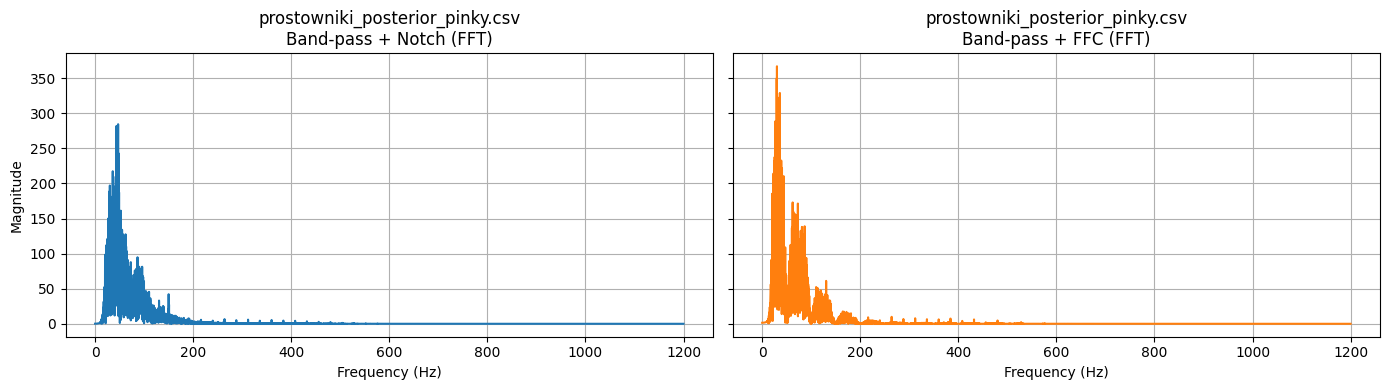

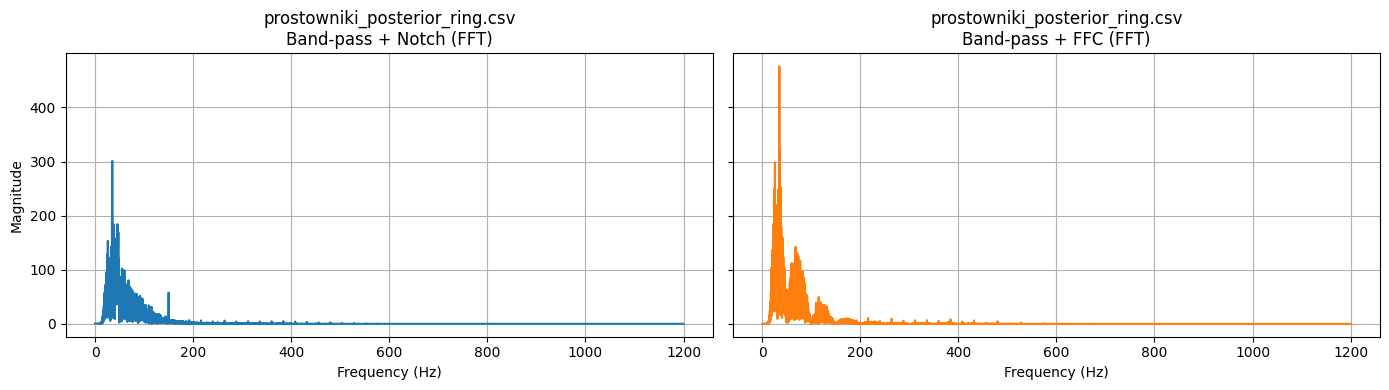

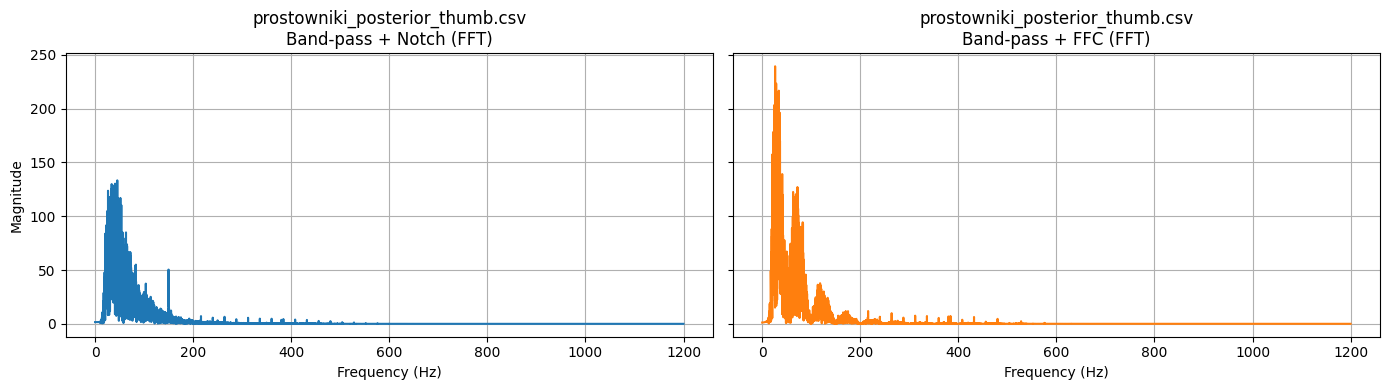

In [82]:
for filename in csv_files_posterior_prostowniki:
    adc_values = pd.read_csv(filename, header=None).squeeze()
    adc_values = adc_values[100:].reset_index(drop=True)
    time = np.arange(len(adc_values)) / fs

    # Band-pass + Notch
    bandpassed = bandpass_filter(adc_values, fs)
    bandpass_notch = notch_filter(bandpassed, fs)
    # bandpass_notch = notch_filter50hz(bandpassed, fs)
    # bandpass_notch = notch_filter150hz(bandpass_notch, fs)

    # Band-pass + FFC (band-pass first, then FFC)
    bandpassed_ffc = bandpass_filter(adc_values, fs)
    ffc = comb_filter(bandpassed_ffc, fs)

    # Frequency response for Band-pass + Notch
    n = len(bandpass_notch)
    fft_notch = np.fft.fft(bandpass_notch)
    freq_notch = np.fft.fftfreq(n, d=1/fs)

    # Frequency response for Band-pass + FFC
    n2 = len(ffc)
    fft_ffc = np.fft.fft(ffc)
    freq_ffc = np.fft.fftfreq(n2, d=1/fs)

    fig, axs = plt.subplots(1, 2, figsize=(14, 4), sharey=True)
    axs[0].plot(freq_notch[:n//2], np.abs(fft_notch)[:n//2], color='tab:blue')
    axs[0].set_title(f"{filename}\nBand-pass + Notch (FFT)")
    axs[0].set_xlabel("Frequency (Hz)")
    axs[0].set_ylabel("Magnitude")
    axs[0].grid(True)

    axs[1].plot(freq_ffc[:n2//2], np.abs(fft_ffc)[:n2//2], color='tab:orange')
    axs[1].set_title(f"{filename}\nBand-pass + FFC (FFT)")
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

### Zginacze

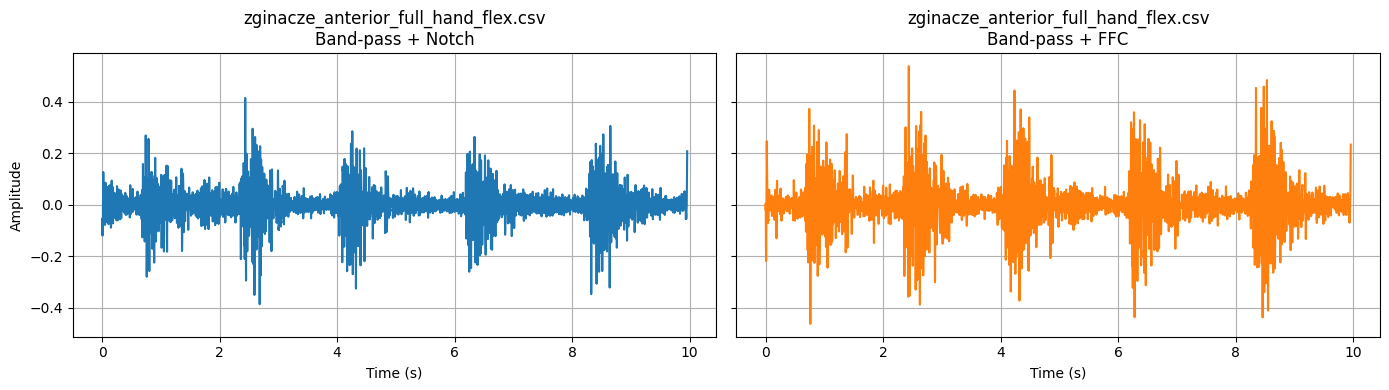

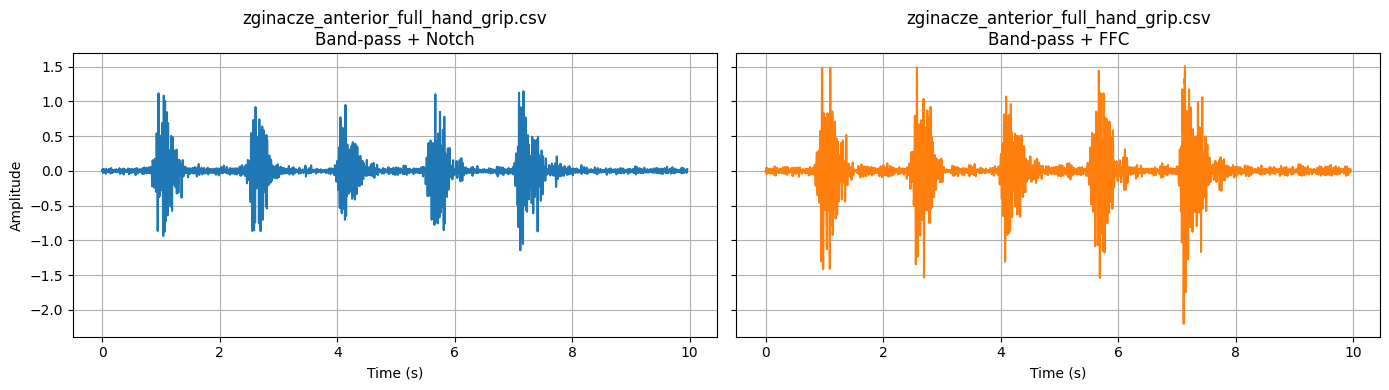

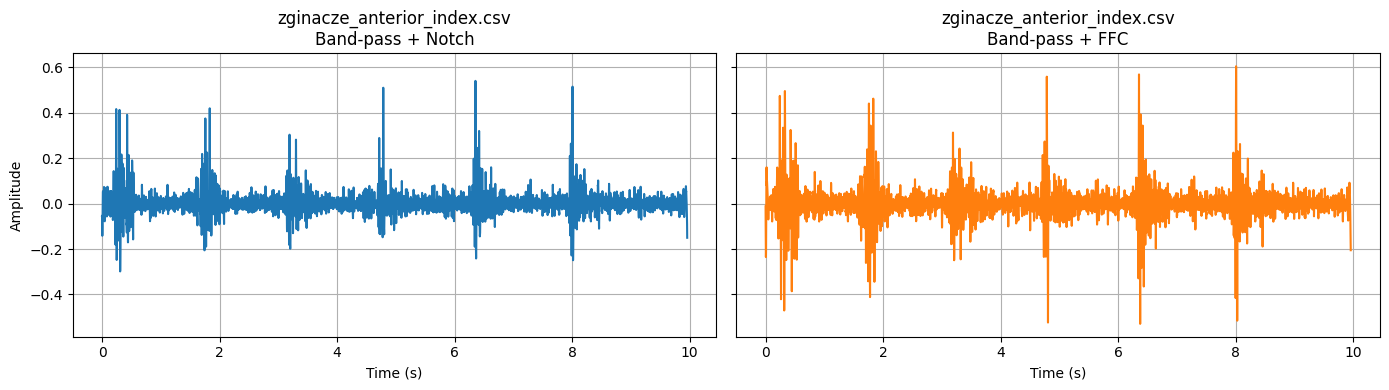

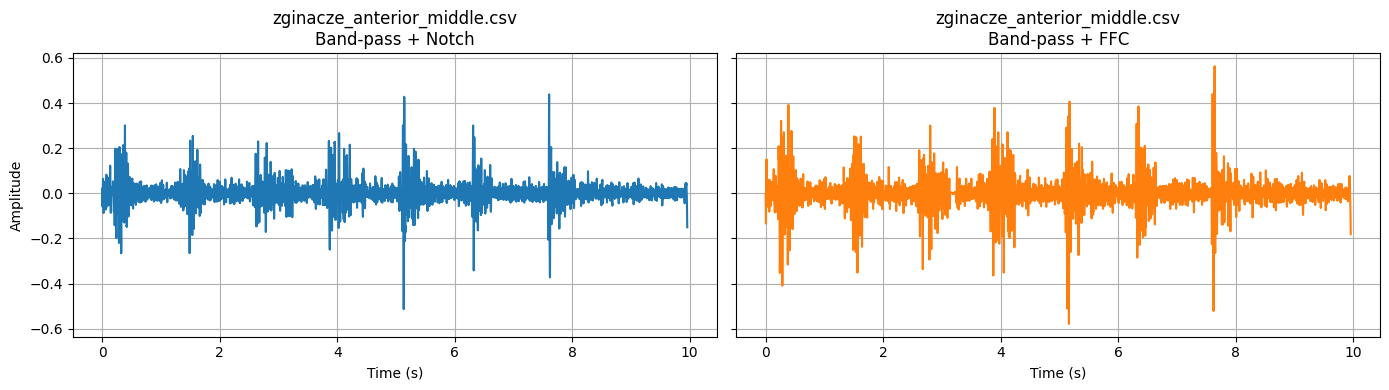

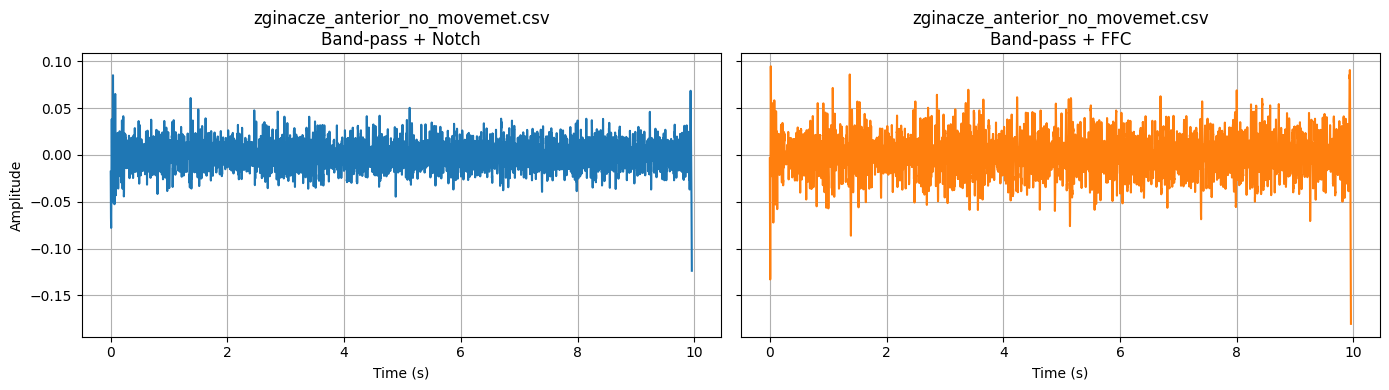

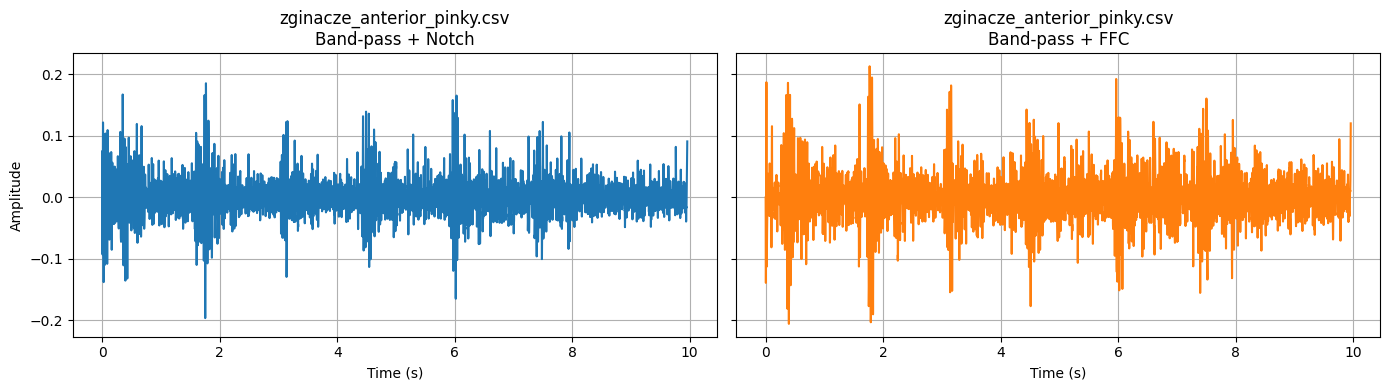

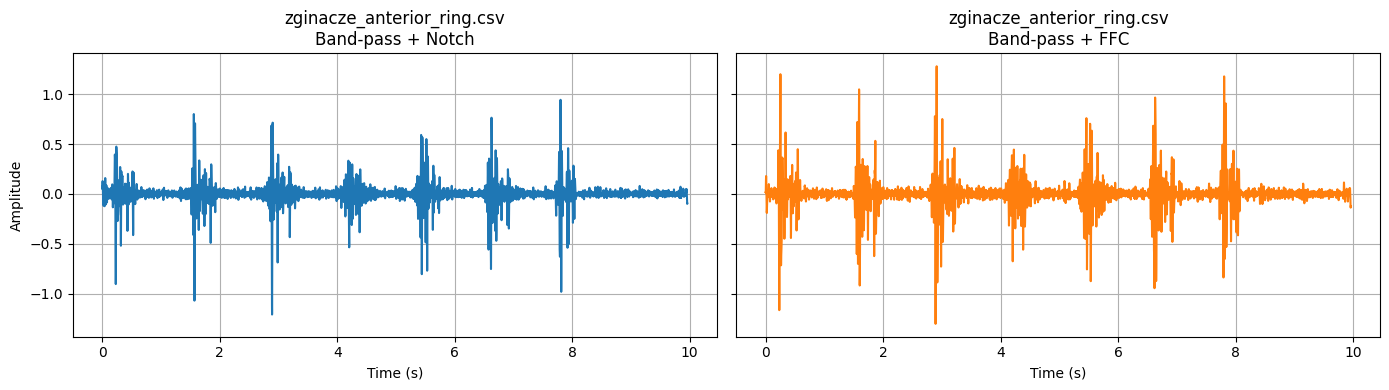

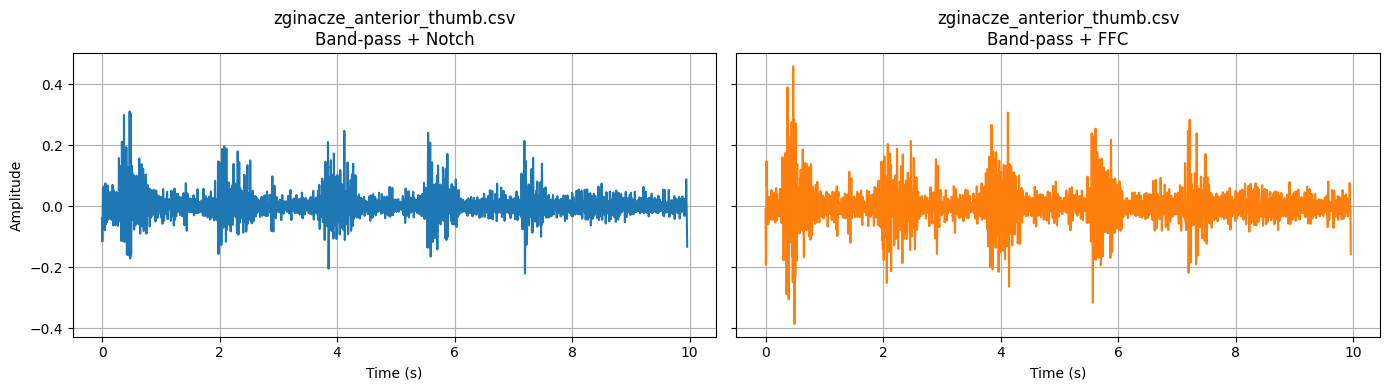

In [83]:
for filename in csv_files_anterior_zginacze:
    adc_values = pd.read_csv(filename, header=None).squeeze()
    adc_values = adc_values[100:].reset_index(drop=True)
    time = np.arange(len(adc_values)) / fs

    # Band-pass + Notch
    bandpassed = bandpass_filter(adc_values, fs)
    bandpass_notch = notch_filter(bandpassed, fs)

    # Band-pass + FFC (band-pass first, then FFC)
    bandpassed_ffc = bandpass_filter(adc_values, fs)
    ffc = comb_filter(bandpassed_ffc, fs)

    fig, axs = plt.subplots(1, 2, figsize=(14, 4), sharey=True)
    axs[0].plot(time, bandpass_notch, color='tab:blue')
    axs[0].set_title(f"{filename}\nBand-pass + Notch")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Amplitude")
    axs[0].grid(True)

    axs[1].plot(time, ffc, color='tab:orange')
    axs[1].set_title(f"{filename}\nBand-pass + FFC")
    axs[1].set_xlabel("Time (s)")
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

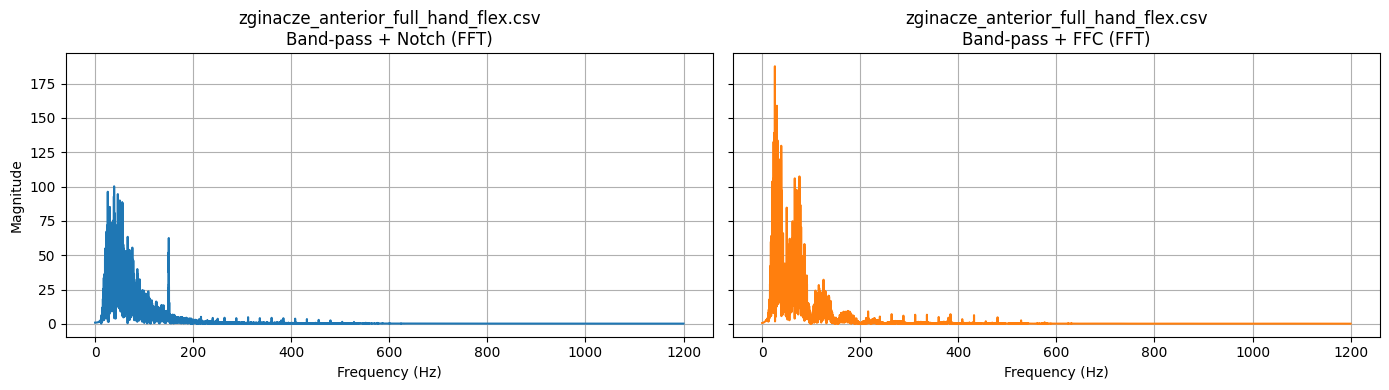

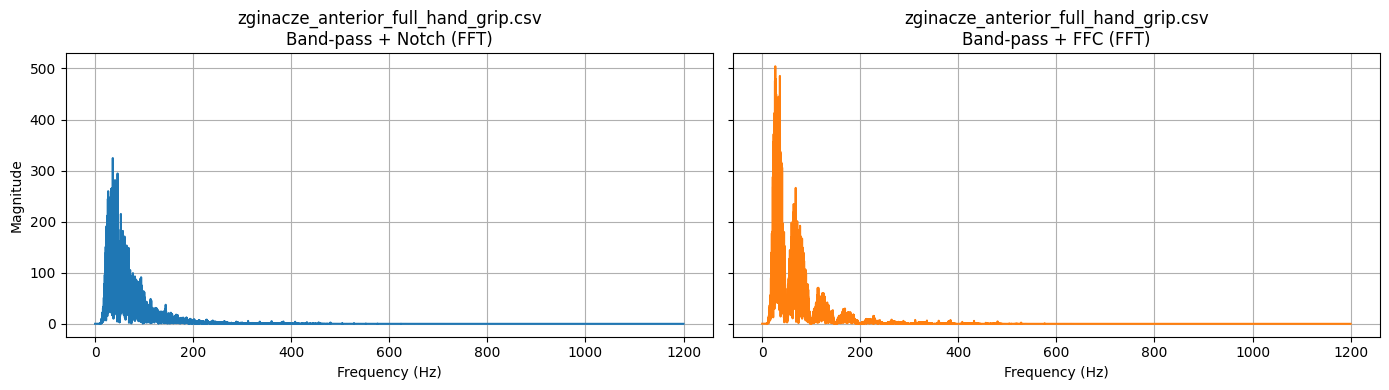

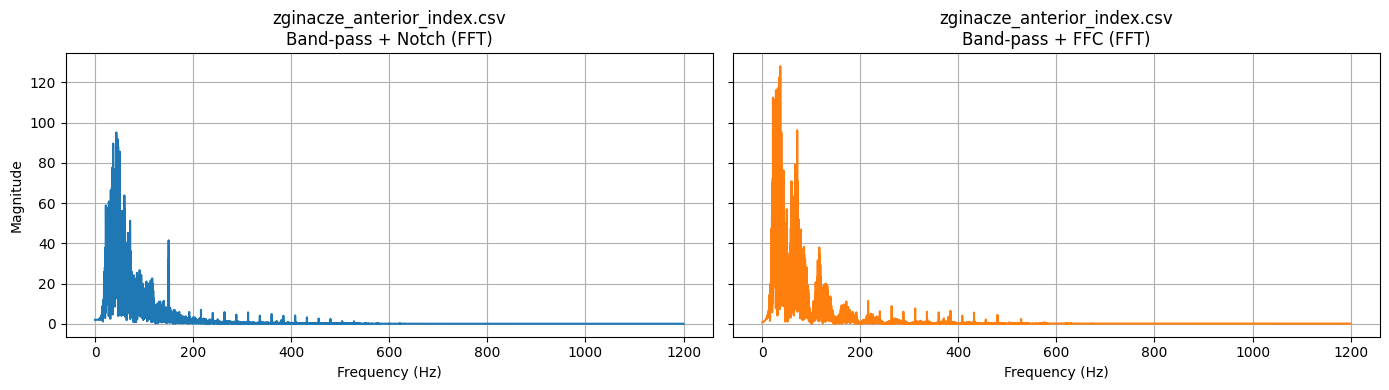

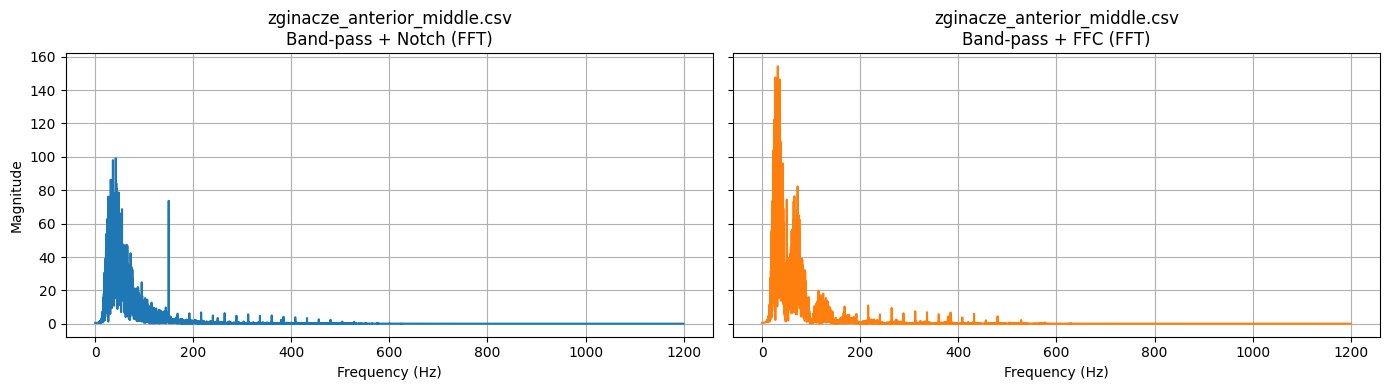

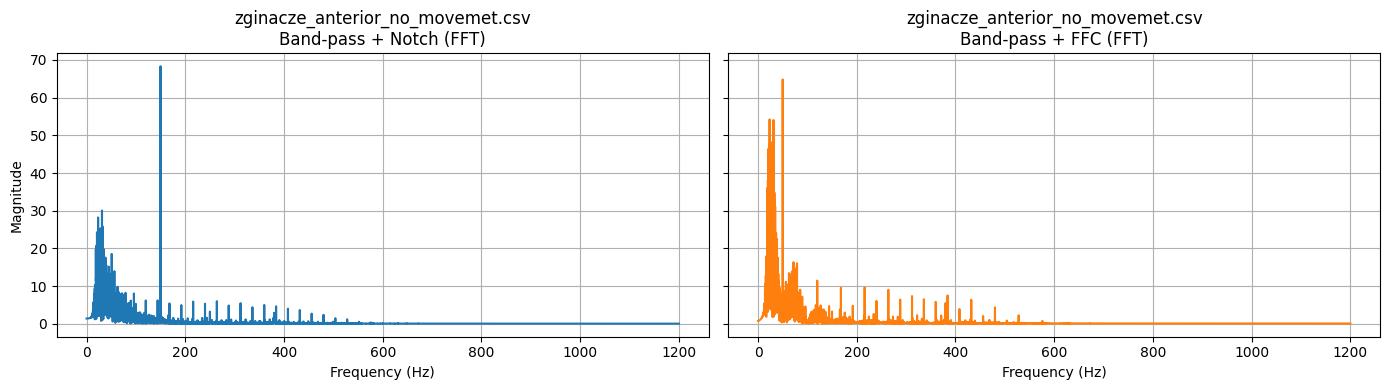

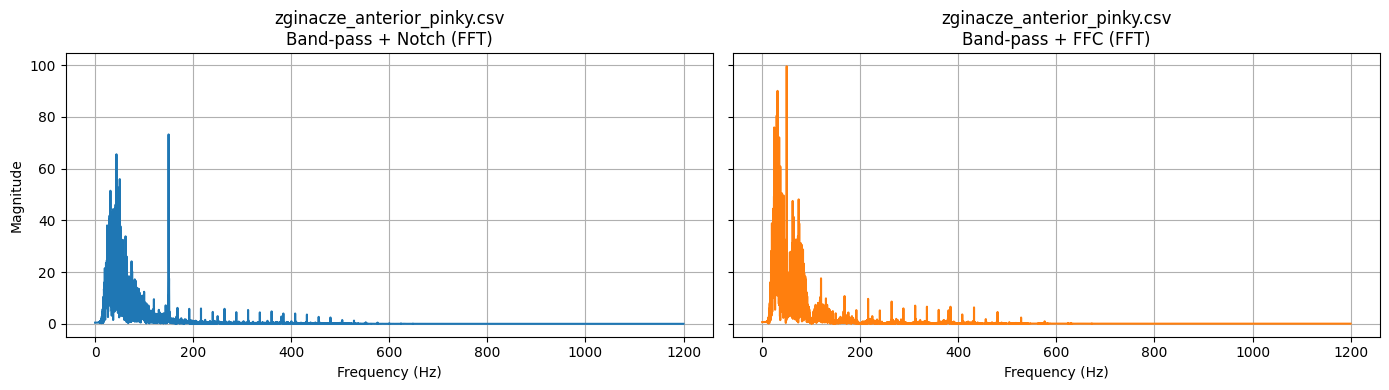

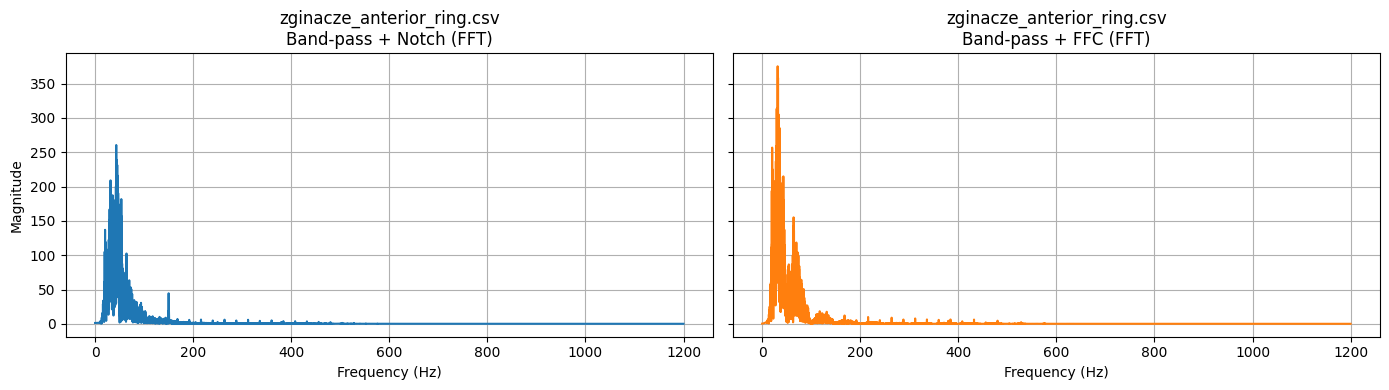

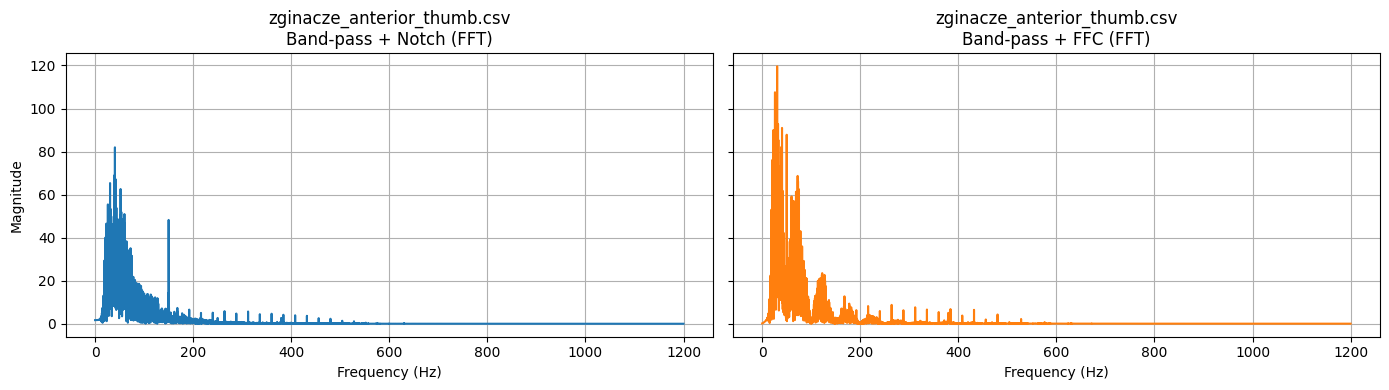

In [84]:
for filename in csv_files_anterior_zginacze:
    adc_values = pd.read_csv(filename, header=None).squeeze()
    adc_values = adc_values[100:].reset_index(drop=True)
    time = np.arange(len(adc_values)) / fs

    # Band-pass + Notch
    bandpassed = bandpass_filter(adc_values, fs)
    bandpass_notch = notch_filter(bandpassed, fs)

    # Band-pass + FFC (band-pass first, then FFC)
    bandpassed_ffc = bandpass_filter(adc_values, fs)
    ffc = comb_filter(bandpassed_ffc, fs)

    # Frequency response for Band-pass + Notch
    n = len(bandpass_notch)
    fft_notch = np.fft.fft(bandpass_notch)
    freq_notch = np.fft.fftfreq(n, d=1/fs)

    # Frequency response for Band-pass + FFC
    n2 = len(ffc)
    fft_ffc = np.fft.fft(ffc)
    freq_ffc = np.fft.fftfreq(n2, d=1/fs)

    fig, axs = plt.subplots(1, 2, figsize=(14, 4), sharey=True)
    axs[0].plot(freq_notch[:n//2], np.abs(fft_notch)[:n//2], color='tab:blue')
    axs[0].set_title(f"{filename}\nBand-pass + Notch (FFT)")
    axs[0].set_xlabel("Frequency (Hz)")
    axs[0].set_ylabel("Magnitude")
    axs[0].grid(True)

    axs[1].plot(freq_ffc[:n2//2], np.abs(fft_ffc)[:n2//2], color='tab:orange')
    axs[1].set_title(f"{filename}\nBand-pass + FFC (FFT)")
    axs[1].set_xlabel("Frequency (Hz)")
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

## Zgniacze full motion

### Raw

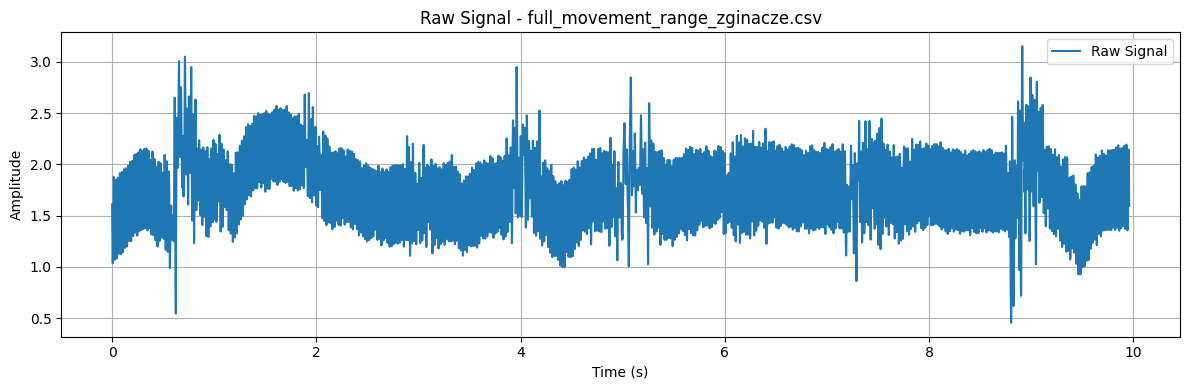

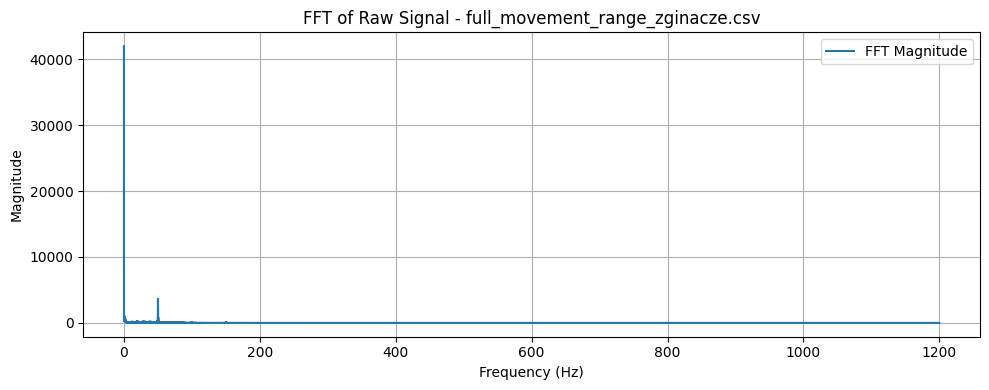

In [85]:
# Plot raw signal and its FFT for csv_file_anterior_zgniacze_full_movemnet

adc_values = pd.read_csv(csv_file_anterior_zgniacze_full_movemnet, header=None).squeeze()
adc_values = adc_values[100:].reset_index(drop=True)
time = np.arange(len(adc_values)) / fs

# Plot raw signal
plt.figure(figsize=(12, 4))
plt.plot(time, adc_values, label='Raw Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Raw Signal - full_movement_range_zginacze.csv')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# FFT of raw signal
n = len(adc_values)
fft_signal = np.fft.fft(adc_values)
fft_freq = np.fft.fftfreq(n, d=1/fs)

plt.figure(figsize=(10, 4))
plt.plot(fft_freq[:n//2], np.abs(fft_signal)[:n//2], label='FFT Magnitude')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of Raw Signal - full_movement_range_zginacze.csv')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

### Filtered

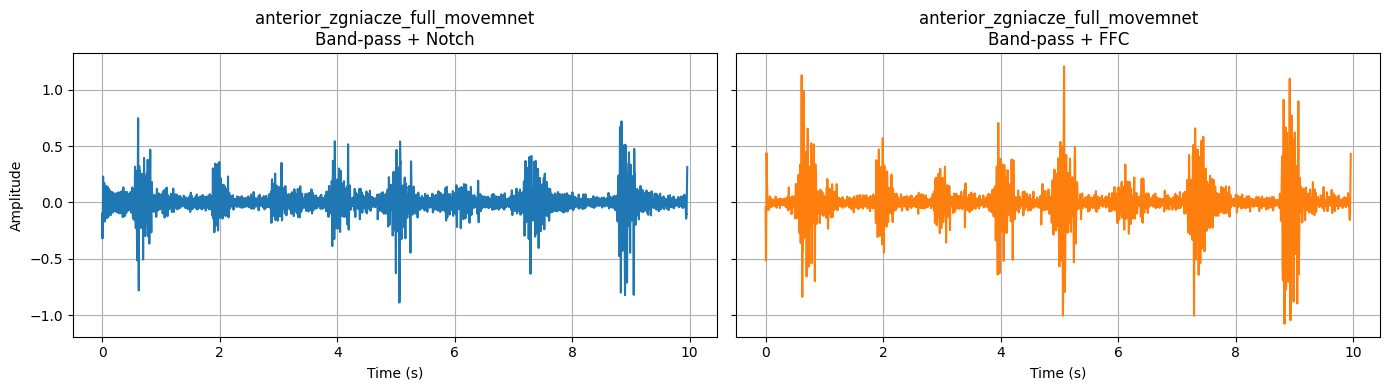

In [86]:
adc_values = pd.read_csv(csv_file_anterior_zgniacze_full_movemnet, header=None).squeeze()
adc_values = adc_values[100:].reset_index(drop=True)
time = np.arange(len(adc_values)) / fs

# Band-pass + Notch
bandpassed = bandpass_filter(adc_values, fs)
bandpass_notch = notch_filter(bandpassed, fs)

# Band-pass + FFC (band-pass first, then FFC)
bandpassed_ffc = bandpass_filter(adc_values, fs)
ffc = comb_filter(bandpassed_ffc, fs)

fig, axs = plt.subplots(1, 2, figsize=(14, 4), sharey=True)
axs[0].plot(time, bandpass_notch, color='tab:blue')
axs[0].set_title(f"anterior_zgniacze_full_movemnet\nBand-pass + Notch")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude")
axs[0].grid(True)

axs[1].plot(time, ffc, color='tab:orange')
axs[1].set_title(f"anterior_zgniacze_full_movemnet\nBand-pass + FFC")
axs[1].set_xlabel("Time (s)")
axs[1].grid(True)

plt.tight_layout()
plt.show()

### FFT

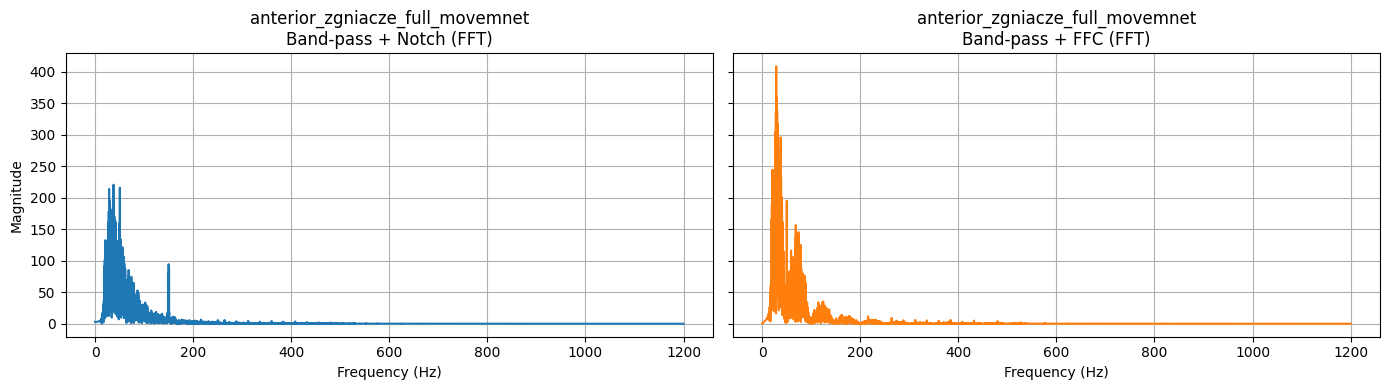

In [87]:
adc_values = pd.read_csv(csv_file_anterior_zgniacze_full_movemnet, header=None).squeeze()
adc_values = adc_values[100:].reset_index(drop=True)
time = np.arange(len(adc_values)) / fs

# Band-pass + Notch
bandpassed = bandpass_filter(adc_values, fs)
bandpass_notch = notch_filter(bandpassed, fs)

# Band-pass + FFC (band-pass first, then FFC)
bandpassed_ffc = bandpass_filter(adc_values, fs)
ffc = comb_filter(bandpassed_ffc, fs)

# Frequency response for Band-pass + Notch
n = len(bandpass_notch)
fft_notch = np.fft.fft(bandpass_notch)
freq_notch = np.fft.fftfreq(n, d=1/fs)

# Frequency response for Band-pass + FFC
n2 = len(ffc)
fft_ffc = np.fft.fft(ffc)
freq_ffc = np.fft.fftfreq(n2, d=1/fs)

fig, axs = plt.subplots(1, 2, figsize=(14, 4), sharey=True)
axs[0].plot(freq_notch[:n//2], np.abs(fft_notch)[:n//2], color='tab:blue')
axs[0].set_title(f"anterior_zgniacze_full_movemnet\nBand-pass + Notch (FFT)")
axs[0].set_xlabel("Frequency (Hz)")
axs[0].set_ylabel("Magnitude")
axs[0].grid(True)

axs[1].plot(freq_ffc[:n2//2], np.abs(fft_ffc)[:n2//2], color='tab:orange')
axs[1].set_title(f"anterior_zgniacze_full_movemnet\nBand-pass + FFC (FFT)")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].grid(True)

plt.tight_layout()
plt.show()